In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3

In [6]:
con = sqlite3.connect('Resources/zomato_rawdata.sqlite',)

In [7]:
df = pd.read_sql_query("SELECT * FROM Users", con)

In [9]:
df.head(2)

,index,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari


In [14]:
#check for percentage of missing values for each column

df.isna().sum()/len(df)*100

index                           0.000000
url                             0.000000
address                         0.000000
name                            0.000000
online_order                    0.000000
book_table                      0.000000
rate                           15.033741
votes                           0.000000
phone                           2.335789
location                        0.040606
rest_type                       0.438927
dish_liked                     54.291626
cuisines                        0.087012
approx_cost(for two people)     0.669026
reviews_list                    0.000000
menu_item                       0.000000
listed_in(type)                 0.000000
listed_in(city)                 0.000000
dtype: float64

In [15]:
df['rate'].value_counts()

NEW       2208
3.9/5     2098
3.8/5     2022
3.7/5     2011
3.9 /5    1874
          ... 
2.2 /5       7
2.0 /5       7
2.0/5        4
1.8 /5       3
1.8/5        2
Name: rate, Length: 64, dtype: int64

In [16]:
df['rate'].unique()

array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5',
       '3.9/5', '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5',
       '4.3/5', 'NEW', '2.9/5', '3.5/5', None, '2.6/5', '3.8 /5', '3.4/5',
       '4.5/5', '2.5/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5',
       '3.4 /5', '-', '3.6 /5', '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5',
       '4.1 /5', '3.7 /5', '3.1 /5', '2.9 /5', '3.3 /5', '2.8 /5',
       '3.5 /5', '2.7 /5', '2.5 /5', '3.2 /5', '2.6 /5', '4.5 /5',
       '4.3 /5', '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '4.6 /5',
       '4.9 /5', '3.0 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

In [21]:
df['rate'].replace(('NEW','-'), np.nan,inplace=True)

In [28]:
df['rate'] = df['rate'].apply(lambda x: float(x.split('/')[0]) if type(x) == str else x)

In [29]:
df['rate']

0        4.1
1        4.1
2        3.8
3        3.7
4        3.8
        ... 
51712    3.6
51713    NaN
51714    NaN
51715    4.3
51716    3.4
Name: rate, Length: 51717, dtype: float64

In [31]:
x = pd.crosstab(df['rate'],df['online_order'])

<Axes: xlabel='rate'>

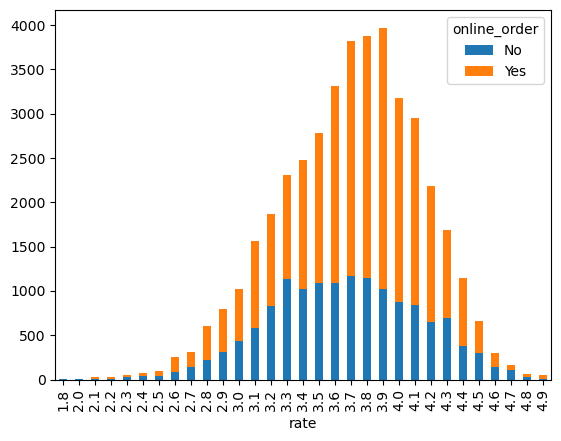

In [34]:
x.plot(kind='bar',stacked=True)

In [37]:
x.sum(axis=1).astype(float)

rate
1.8       5.0
2.0      11.0
2.1      24.0
2.2      26.0
2.3      51.0
2.4      70.0
2.5     101.0
2.6     260.0
2.7     307.0
2.8     600.0
2.9     802.0
3.0    1023.0
3.1    1561.0
3.2    1873.0
3.3    2310.0
3.4    2476.0
3.5    2784.0
3.6    3316.0
3.7    3821.0
3.8    3873.0
3.9    3972.0
4.0    3183.0
4.1    2948.0
4.2    2184.0
4.3    1693.0
4.4    1147.0
4.5     656.0
4.6     300.0
4.7     167.0
4.8      66.0
4.9      55.0
dtype: float64

In [39]:
x.div(x.sum(axis=1).astype(float), axis=0)

online_order,No,Yes
rate,,
1.8,1.000000,0.000000
2.0,1.000000,0.000000
2.1,0.375000,0.625000
2.2,0.384615,0.615385
2.3,0.568627,0.431373
2.4,0.514286,0.485714
2.5,0.376238,0.623762
2.6,0.319231,0.680769
2.7,0.459283,0.540717


In [43]:
normalized_df = round(x.div(x.sum(axis=1).astype(float), axis=0)*100,2)

In [46]:
normalized_df.head(3)

online_order,No,Yes
rate,,
1.8,100.0,0.0
2.0,100.0,0.0
2.1,37.5,62.5


<Axes: xlabel='rate'>

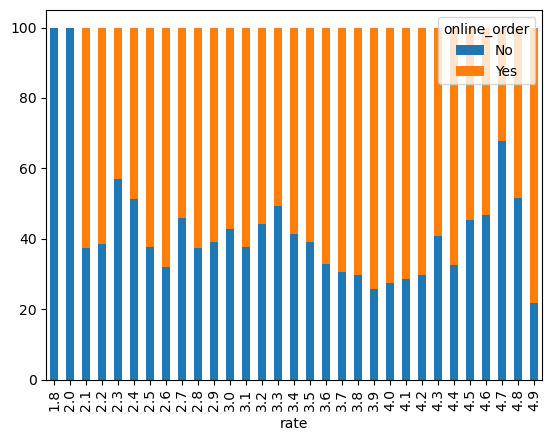

In [47]:
normalized_df.plot(kind='bar',stacked=True)

In [50]:
df['rest_type'].isnull().sum()

227

In [52]:
data = df.dropna(subset=['rest_type'])

In [54]:
data.head(3)

,index,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari


In [55]:
data['rest_type'].unique()

array(['Casual Dining', 'Cafe, Casual Dining', 'Quick Bites',
       'Casual Dining, Cafe', 'Cafe', 'Quick Bites, Cafe',
       'Cafe, Quick Bites', 'Delivery', 'Mess', 'Dessert Parlor',
       'Bakery, Dessert Parlor', 'Pub', 'Bakery', 'Takeaway, Delivery',
       'Fine Dining', 'Beverage Shop', 'Sweet Shop', 'Bar',
       'Beverage Shop, Quick Bites', 'Confectionery',
       'Quick Bites, Beverage Shop', 'Dessert Parlor, Sweet Shop',
       'Bakery, Quick Bites', 'Sweet Shop, Quick Bites', 'Kiosk',
       'Food Truck', 'Quick Bites, Dessert Parlor',
       'Beverage Shop, Dessert Parlor', 'Takeaway', 'Pub, Casual Dining',
       'Casual Dining, Bar', 'Dessert Parlor, Beverage Shop',
       'Quick Bites, Bakery', 'Dessert Parlor, Quick Bites',
       'Microbrewery, Casual Dining', 'Lounge', 'Bar, Casual Dining',
       'Food Court', 'Cafe, Bakery', 'Dhaba', 'Quick Bites, Sweet Shop',
       'Microbrewery', 'Food Court, Quick Bites', 'Pub, Bar',
       'Casual Dining, Pub', 'Lounge, Ba

In [110]:
quick_df = data[data['rest_type'].str.contains('Quick Bites')]

In [111]:
quick_df['reviews_list'] = quick_df['reviews_list'].apply(lambda x: x.lower())

/var/folders/lh/x3hrpfns0kvft_vn9ntrvglm0000gn/T/ipykernel_96809/1047894364.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  quick_df['reviews_list'] = quick_df['reviews_list'].apply(lambda x: x.lower())


In [73]:
import regex as re

In [96]:
pattern = re.compile(
    r"([a-zA-Z]+)"
)

In [97]:
def clean_text(text):
    text = str(text)
    matches = pattern.findall(text)
    return matches

In [112]:
quick_df['reviews_list'] = quick_df['reviews_list'].apply(clean_text)

/var/folders/lh/x3hrpfns0kvft_vn9ntrvglm0000gn/T/ipykernel_96809/1299296204.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  quick_df['reviews_list'] = quick_df['reviews_list'].apply(clean_text)


In [113]:
quick_df['reviews_list']

3        [rated, rated, n, great, food, and, proper, ka...
23       [rated, rated, n, so, went, here, with, friend...
26       [rated, rated, n, please, provide, some, extra...
31       [rated, rated, n, worst, restaurant, ever, veg...
34       [rated, rated, n, not, worth, for, the, money,...
                               ...                        
51641    [rated, rated, n, food, is, not, upto, the, ma...
51642                                                   []
51643                                                   []
51644                                                   []
51645    [rated, rated, n, i, was, randomly, looking, o...
Name: reviews_list, Length: 20639, dtype: object

In [106]:
import regex as re

# Define a pattern to match only the allowed characters
allowed_char_pattern = re.compile(r"[A-Za-z0-9\s.,!?']")

# Apply the pattern to keep only the allowed characters
quick_df['reviews_list'] = quick_df['reviews_list'].apply(
    lambda text: ''.join(allowed_char_pattern.findall(str(text)))
)


/var/folders/lh/x3hrpfns0kvft_vn9ntrvglm0000gn/T/ipykernel_96809/3995058412.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  quick_df['reviews_list'] = quick_df['reviews_list'].apply(


In [118]:
#perform unigram analysis,first remove stopwords (am , are,  that)
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/srdjan/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [121]:
from nltk.corpus import stopwords
stop = stopwords.words('english')

In [122]:
#add repeating values from sample which you don't deem neccessary
stop.extend(['rated','n','nan'])

In [3]:
reviews_only = quick_df['reviews_list']
reviews_only[2]

NameError: name 'quick_df' is not defined

In [157]:
print([token for token in reviews_only[1] if token not in stop])

KeyError: 1

In [127]:
reviews_only_cleaned = reviews_only.apply(lambda each_review: [token for token in each_review if token not in stop])

In [153]:
total_reviews[0]

['great',
 'food',
 'proper',
 'karnataka',
 'style',
 'full',
 'meals',
 'twice',
 'fully',
 'satisfied',
 'give',
 'stars',
 'well',
 'managed',
 'reached',
 'place',
 'pm',
 'saturday',
 'half',
 'items',
 'menu',
 'annoying',
 'food',
 'cold',
 'taste',
 'also',
 'average',
 'dosa',
 'holige',
 'good',
 'people',
 'restaurant',
 'service',
 'still',
 'slow',
 'waiters',
 'standing',
 'one',
 'corner',
 'talking',
 'call',
 'repeatedly',
 'good',
 'food',
 'served',
 'tasty',
 'good',
 'place',
 'go',
 'freinds',
 'family',
 'first',
 'get',
 'served',
 'well',
 'food',
 'one',
 'good',
 'hotel',
 'price',
 'udupi',
 'restaurant',
 'dirty',
 'floor',
 'walls',
 'waiters',
 'stained',
 'food',
 'cant',
 'clean',
 'floor',
 'even',
 'decorative',
 'colour',
 'paper',
 'every',
 'lot',
 'food',
 'coming',
 'taste',
 'food',
 'pretty',
 'decent',
 'chargw',
 'upset',
 'us',
 'menu',
 'says',
 'serve',
 'thambuli',
 'two',
 'variety',
 'rice',
 'etc',
 'still',
 'charged',
 'us',
 'full'

In [132]:
total_reviews = list(reviews_only_cleaned)

In [151]:
oneword_list = []
for review in total_reviews:
    for word in review:
        oneword_list.append(word)
        

In [162]:
new_word_list = []
for i in oneword_list:
    if i == 'x':
        continue
    else:
        new_word_list.append(i)

In [165]:
len(new_word_list)

6623270

In [166]:
len(oneword_list)

7530284

In [137]:
from nltk import FreqDist

In [171]:
fd = FreqDist()

In [172]:
for word in new_word_list:
    fd[word] = fd[word]+1

In [173]:
fd.most_common(20)

[('food', 170672),
 ('good', 169085),
 ('place', 142338),
 ('chicken', 76826),
 ('taste', 70602),
 ('ordered', 55485),
 ('try', 43663),
 ('one', 43359),
 ('also', 42296),
 ('like', 41979),
 ('service', 39651),
 ('time', 38409),
 ('order', 37012),
 ('really', 36239),
 ('biryani', 35488),
 ('best', 33589),
 ('restaurant', 32669),
 ('great', 32601),
 ('quality', 30940),
 ('nice', 30744)]

In [174]:
#perform bi-gram and trigram analysis
from nltk import bigrams, trigrams

In [175]:
bi_grams = bigrams(new_word_list)

In [177]:
bi_grams

<generator object bigrams at 0x7f914d30deb0>

In [180]:
fd_bigrams = FreqDist()

for bigram in bi_grams:
    fd_bigrams[bigram]=fd_bigrams[bigram] +1

In [181]:
fd_bigrams.most_common(20)

[(('must', 'try'), 13250),
 (('good', 'food'), 11531),
 (('food', 'good'), 11134),
 (('really', 'good'), 9919),
 (('north', 'indian'), 9059),
 (('pocket', 'friendly'), 8170),
 (('taste', 'good'), 8100),
 (('good', 'place'), 8055),
 (('value', 'money'), 7139),
 (('south', 'indian'), 7032),
 (('good', 'taste'), 6593),
 (('visit', 'place'), 6296),
 (('also', 'good'), 6170),
 (('one', 'best'), 6107),
 (('fried', 'rice'), 5960),
 (('quality', 'food'), 5822),
 (('chicken', 'biryani'), 5536),
 (('xa', 'xa'), 5351),
 (('non', 'veg'), 5296),
 (('ordered', 'chicken'), 5256)]

In [184]:
tri_grams = trigrams(new_word_list)

In [186]:
fd_trigrams = FreqDist()

for trigram in tri_grams:
    fd_trigrams[trigram]=fd_trigrams[trigram] +1

In [188]:
fd_trigrams.most_common(30)

[(('xa', 'xa', 'xa'), 5059),
 (('north', 'indian', 'food'), 3079),
 (('f', 'f', 'f'), 2581),
 (('paneer', 'butter', 'masala'), 1638),
 (('must', 'visit', 'place'), 1594),
 (('south', 'indian', 'food'), 1486),
 (('good', 'food', 'good'), 1367),
 (('ordered', 'chicken', 'biryani'), 1275),
 (('pocket', 'friendly', 'place'), 1059),
 (('chicken', 'fried', 'rice'), 1050),
 (('f', 'c', 'f'), 1042),
 (('food', 'really', 'good'), 1021),
 (('veg', 'non', 'veg'), 1013),
 (('worst', 'food', 'ever'), 939),
 (('like', 'home', 'made'), 897),
 (('must', 'try', 'place'), 896),
 (('good', 'taste', 'good'), 827),
 (('good', 'value', 'money'), 825),
 (('south', 'indian', 'breakfast'), 816),
 (('home', 'made', 'food'), 787),
 (('food', 'reasonable', 'price'), 746),
 (('good', 'quality', 'food'), 732),
 (('ghar', 'ka', 'khana'), 693),
 (('keep', 'good', 'work'), 692),
 (('taste', 'really', 'good'), 686),
 (('home', 'cooked', 'food'), 653),
 (('quality', 'food', 'good'), 649),
 (('food', 'quality', 'good'), 

In [189]:
df.head(3)

,index,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari


In [202]:
conda install conda-forge::geopy

done
Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 22.11.1
  latest version: 24.9.2

Please update conda by running

    $ conda update -n base -c conda-forge conda

Or to minimize the number of packages updated during conda update use

     conda install conda=24.9.2



## Package Plan ##

  environment location: /Users/srdjan/opt/anaconda3

  added / updated specs:
    - conda-forge::geopy


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    geographiclib-2.0          |   py38hecd8cb5_0          70 KB
    geopy-2.4.1                |     pyhd8ed1ab_1          71 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         141 KB

The following NEW packages will be INSTALLED:

  geographiclib      pkgs/main/osx-64::geographiclib-2.0-py38hecd8cb5_0 
  geopy       

In [194]:
df['location'] = df['location'] + ', Bangalore, Karnataka , India'

In [195]:
df_copy = df.copy()
df_copy['location'].isnull().sum()

21

In [196]:
df_copy.dropna(subset=['location'],inplace=True)

In [197]:
df_copy['location'].isnull().sum()

0

In [198]:
location_df = pd.DataFrame(df_copy['location'].unique())

In [199]:
location_df

,0
0,"Banashankari, Bangalore, Karnataka , India"
1,"Basavanagudi, Bangalore, Karnataka , India"
2,"Mysore Road, Bangalore, Karnataka , India"
3,"Jayanagar, Bangalore, Karnataka , India"
4,"Kumaraswamy Layout, Bangalore, Karnataka , India"
...,...
88,"West Bangalore, Bangalore, Karnataka , India"
89,"Magadi Road, Bangalore, Karnataka , India"
90,"Yelahanka, Bangalore, Karnataka , India"
91,"Sahakara Nagar, Bangalore, Karnataka , India"


In [200]:
location_df.columns = ['name']

In [203]:
from geopy.geocoders import Nominatim

In [204]:
geolocator = Nominatim(user_agent='app', timeout=None)

In [206]:
lat = []
lon = []
for location in location_df['name']:
    location = geolocator.geocode(location)
    if location is None:
        lat.append(np.nan)
        lon.append(np.nan)
    else:
        lat.append(location.latitude)
        lon.append(location.longitude)

In [207]:
location_df['latitude'] = lat

In [208]:
location_df['longitude'] = lon

In [209]:
location_df

,name,latitude,longitude
0,"Banashankari, Bangalore, Karnataka , India",12.939333,77.553982
1,"Basavanagudi, Bangalore, Karnataka , India",12.941726,77.575502
2,"Mysore Road, Bangalore, Karnataka , India",12.960381,77.557009
3,"Jayanagar, Bangalore, Karnataka , India",12.939904,77.582638
4,"Kumaraswamy Layout, Bangalore, Karnataka , India",12.906768,77.559502
...,...,...,...
88,"West Bangalore, Bangalore, Karnataka , India",13.009652,77.553054
89,"Magadi Road, Bangalore, Karnataka , India",12.975653,77.555355
90,"Yelahanka, Bangalore, Karnataka , India",13.107915,77.585524
91,"Sahakara Nagar, Bangalore, Karnataka , India",13.062147,77.580061


In [222]:
location_df[location_df['latitude'].isnull()]

,name,latitude,longitude


In [219]:
location_df['latitude'][79] = 13.0163
location_df['latitude'][85] = 13.0068

/var/folders/lh/x3hrpfns0kvft_vn9ntrvglm0000gn/T/ipykernel_96809/1720577703.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  location_df['latitude'][79] = 13.0163
/var/folders/lh/x3hrpfns0kvft_vn9ntrvglm0000gn/T/ipykernel_96809/1720577703.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  location_df['latitude'][85] = 13.0068


In [221]:
location_df['longitude'][79] = 77.6785
location_df['longitude'][85] = 77.5813

/var/folders/lh/x3hrpfns0kvft_vn9ntrvglm0000gn/T/ipykernel_96809/3045206578.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  location_df['longitude'][79] = 77.6785
/var/folders/lh/x3hrpfns0kvft_vn9ntrvglm0000gn/T/ipykernel_96809/3045206578.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  location_df['longitude'][85] = 77.5813


In [227]:
df_north_india = df[df['cuisines'].str.contains('North Indian')]

In [224]:
df['cuisines'].isnull().sum()

45

In [225]:
df = df.dropna(subset=['cuisines'])

In [232]:
df_north_india_count =  df_north_india['location'].value_counts().reset_index().rename(columns={'index':'name', 'location':'count'})

In [235]:
df_heatmap = df_north_india_count.merge(location_df,on='name',how='left')

In [238]:
import folium

In [239]:
basemap = folium.Map()

In [1]:
basemap

NameError: name 'basemap' is not defined

In [241]:
from folium.plugins import HeatMap

In [242]:
HeatMap(data = df_heatmap[['latitude','longitude','count']]).add_to(basemap)

In [243]:
basemap

In [245]:
def get_heatmap(cuisine):
        cuisine_df = df[df['cuisines'].str.contains(cuisine)]
        rest_count = cuisine_df['location'].value_counts().reset_index().rename(columns={'index':'name', 'location':'count'})
        df_heatmap = rest_count.merge(location_df,on='name',how='left')
        basemap = folium.Map()
        HeatMap(data = df_heatmap[['latitude','longitude','count']]).add_to(basemap)
        return basemap

In [246]:
get_heatmap('South Indian')

In [247]:
df['cuisines'].unique()

array(['North Indian, Mughlai, Chinese', 'Chinese, North Indian, Thai',
       'Cafe, Mexican, Italian', ...,
       'North Indian, Street Food, Biryani', 'Chinese, Mughlai',
       'North Indian, Chinese, Arabian, Momos'], dtype=object)